In [9]:
# ======================================
# 1️⃣ CÀI ĐẶT & IMPORT
# ======================================
!pip install tensorflow matplotlib numpy

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
import matplotlib.pyplot as plt
import numpy as np
import os


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:

# ======================================
# 2️⃣ TẠO BỘ DỮ LIỆU TRASHNET
# ======================================
dataset_dir = 'dataset_resized'  
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=25,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_gen.num_classes

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [11]:

# ======================================
# 3️⃣ HÀM XÂY DỰNG MÔ HÌNH
# ======================================
def build_model(base_model):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [12]:
# ======================================
# 4️⃣ KHỞI TẠO CÁC MÔ HÌNH
# ======================================
models_dict = {
    "MobileNetV2": build_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "EfficientNetB0": build_model(EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "ResNet50": build_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)))
}

In [13]:
# ======================================
# 5️⃣ HUẤN LUYỆN & GHI NHẬN KẾT QUẢ
# ======================================
results = {}

epochs = 30
steps_per_epoch = train_gen.samples // batch_size
validation_steps = val_gen.samples // batch_size

for name, model in models_dict.items():
    print(f"\n============================")
    print(f"🚀 Đang huấn luyện mô hình: {name}")
    print(f"============================")

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1
    )

    # Lưu kết quả
    results[name] = history.history

    # Lưu các trained model
    model.save(f'{name}_model.h5')



🚀 Đang huấn luyện mô hình: MobileNetV2
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 242ms/step - accuracy: 0.5733 - loss: 1.1450 - val_accuracy: 0.6687 - val_loss: 0.8433
Epoch 2/30
 1/63 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.6875 - loss: 0.8439

c:\Users\PC-09\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6875 - loss: 0.8439 - val_accuracy: 0.6500 - val_loss: 0.8342
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.7385 - loss: 0.7154 - val_accuracy: 0.6750 - val_loss: 0.8018
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.7188 - loss: 0.8038 - val_accuracy: 0.7021 - val_loss: 0.7517
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 403ms/step - accuracy: 0.7791 - loss: 0.6119 - val_accuracy: 0.7146 - val_loss: 0.7277
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6562 - loss: 0.8295 - val_accuracy: 0.7208 - val_loss: 0.7087
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.7982 - loss: 0.5526 - val_accuracy: 0.7083 - val_loss: 0.7384
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.7500 - loss: 0.6962 - val_accuracy: 0.7021 - val_loss: 0.7655
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.8062 - loss: 0.5159 - val_accuracy: 0.7250 - val_


🚀 Đang huấn luyện mô hình: EfficientNetB0
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 489ms/step - accuracy: 0.1978 - loss: 1.7675 - val_accuracy: 0.2333 - val_loss: 1.7267
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.2188 - loss: 1.8018 - val_accuracy: 0.2333 - val_loss: 1.7218
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 468ms/step - accuracy: 0.2209 - loss: 1.7382 - val_accuracy: 0.2333 - val_loss: 1.7282
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.3125 - loss: 1.7720 - val_accuracy: 0.2333 - val_loss: 1.7252
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - accuracy: 0.2274 - loss: 1.7361 - val_accuracy: 0.2438 - val_loss: 1.7327
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.1875 - loss: 1.7058 - val_accuracy: 0.2188 - val_loss: 1.7350
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 464ms/step - accuracy: 0.2249 - loss: 1.7408 - val_accuracy: 0.2354 - val_loss: 1.7217
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accurac


🚀 Đang huấn luyện mô hình: ResNet50
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 826ms/step - accuracy: 0.2219 - loss: 1.8252 - val_accuracy: 0.2688 - val_loss: 1.6922
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.3750 - loss: 1.6514 - val_accuracy: 0.2875 - val_loss: 1.6833
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 823ms/step - accuracy: 0.2671 - loss: 1.7006 - val_accuracy: 0.2396 - val_loss: 1.6572
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.2188 - loss: 1.7599 - val_accuracy: 0.2729 - val_loss: 1.6610
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 825ms/step - accuracy: 0.2495 - loss: 1.6838 - val_accuracy: 0.2979 - val_loss: 1.6415
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.2812 - loss: 1.6763 - val_accuracy: 0.2937 - val_loss: 1.6528
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 751ms/step - accuracy: 0.2605 - loss: 1.6775 - val_accuracy: 0.3250 - val_loss: 1.6382
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accur

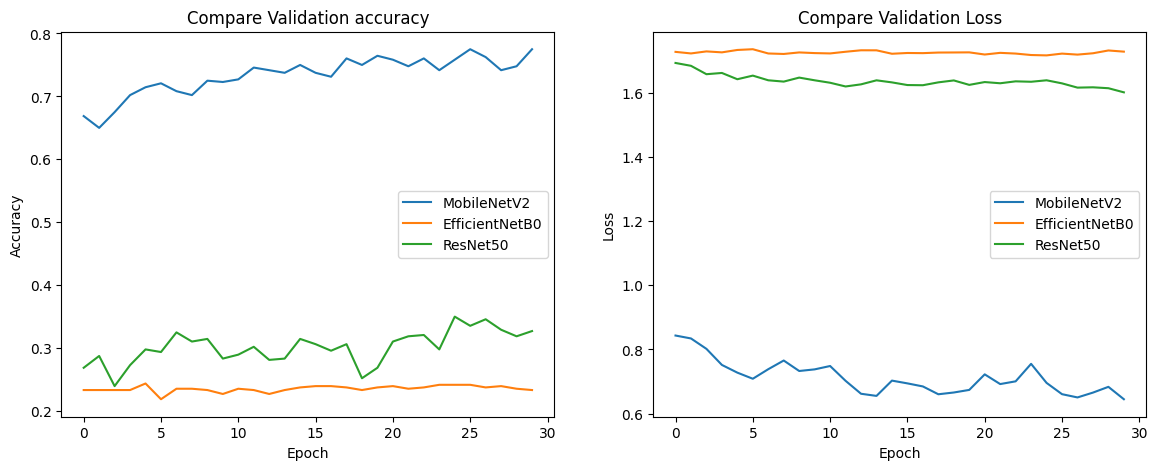

In [14]:

# ======================================
# 6️⃣ VẼ BIỂU ĐỒ SO SÁNH
# ======================================
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
for name, hist in results.items():
    plt.plot(hist['val_accuracy'], label=f'{name}')
plt.title('Compare Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
for name, hist in results.items():
    plt.plot(hist['val_loss'], label=f'{name}')
plt.title('Compare Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [15]:

# ======================================
# 7️⃣ IN KẾT QUẢ CUỐI
# ======================================
for name, hist in results.items():
    acc = hist['val_accuracy'][-1]
    loss = hist['val_loss'][-1]
    print(f"✅ {name}: Validation Accuracy = {acc:.4f}, Loss = {loss:.4f}")

✅ MobileNetV2: Validation Accuracy = 0.7750, Loss = 0.6449
✅ EfficientNetB0: Validation Accuracy = 0.2333, Loss = 1.7274
✅ ResNet50: Validation Accuracy = 0.3271, Loss = 1.6007
